In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

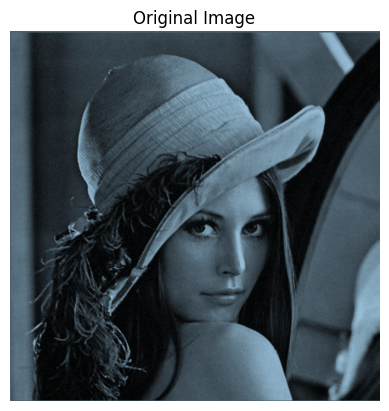

In [ ]:
# Load the image
img = cv2.imread('Lena_Image.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


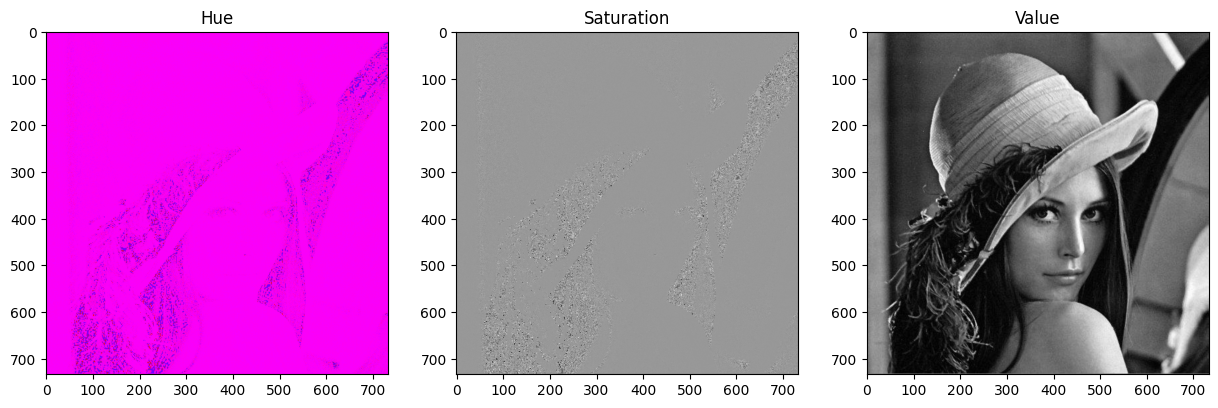

In [ ]:
# Convert to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Display the HSV channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(hsv_img[:, :, 0], cmap='hsv')
axes[0].set_title('Hue')
axes[1].imshow(hsv_img[:, :, 1], cmap='gray')
axes[1].set_title('Saturation')
axes[2].imshow(hsv_img[:, :, 2], cmap='gray')
axes[2].set_title('Value')

plt.show()


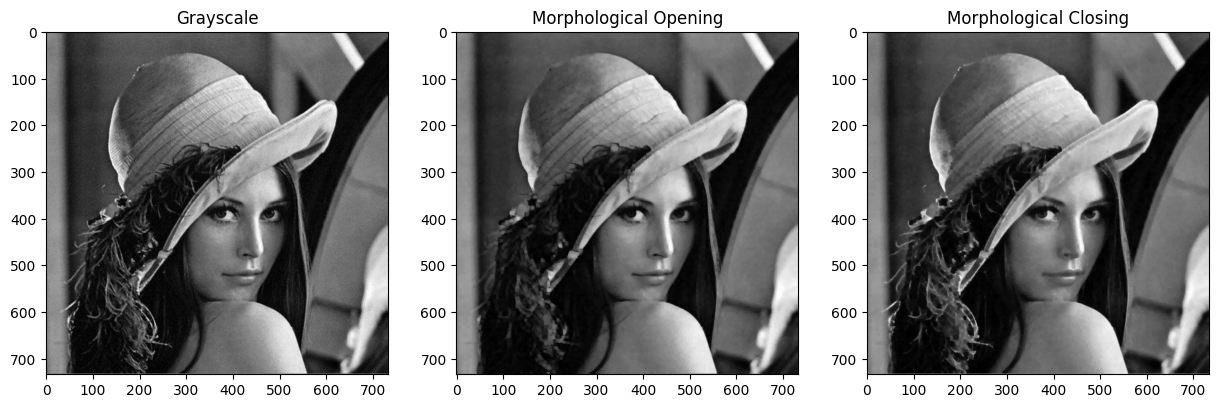

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply morphological operations
kernel = np.ones((5, 5), np.uint8)
morph_open = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
morph_close = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Grayscale')

axes[1].imshow(morph_open, cmap='gray')
axes[1].set_title('Morphological Opening')

axes[2].imshow(morph_close, cmap='gray')
axes[2].set_title('Morphological Closing')

plt.show()


In [ ]:
# Load Image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
# Edge-Based Segmentation (Canny Edge Detection)
def edge_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

In [ ]:
# Region-Based Segmentation (Thresholding)
def region_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return binary

In [ ]:
# Hough Transform - Line Detection
def hough_line_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)
    result = image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return result

In [ ]:
# Hough Transform - Circle Detection
def hough_circle_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=30)
    result = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
    return result

In [ ]:
# Display Images
def display_results(original, edge, region, line, circle):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    axs[0].imshow(original)
    axs[0].set_title("Original")
    axs[1].imshow(edge, cmap='gray')
    axs[1].set_title("Edge-Based Segmentation")
    axs[2].imshow(region, cmap='gray')
    axs[2].set_title("Region-Based Segmentation")
    axs[3].imshow(line)
    axs[3].set_title("Hough Line Detection")
    axs[4].imshow(circle)
    axs[4].set_title("Hough Circle Detection")
    plt.show()

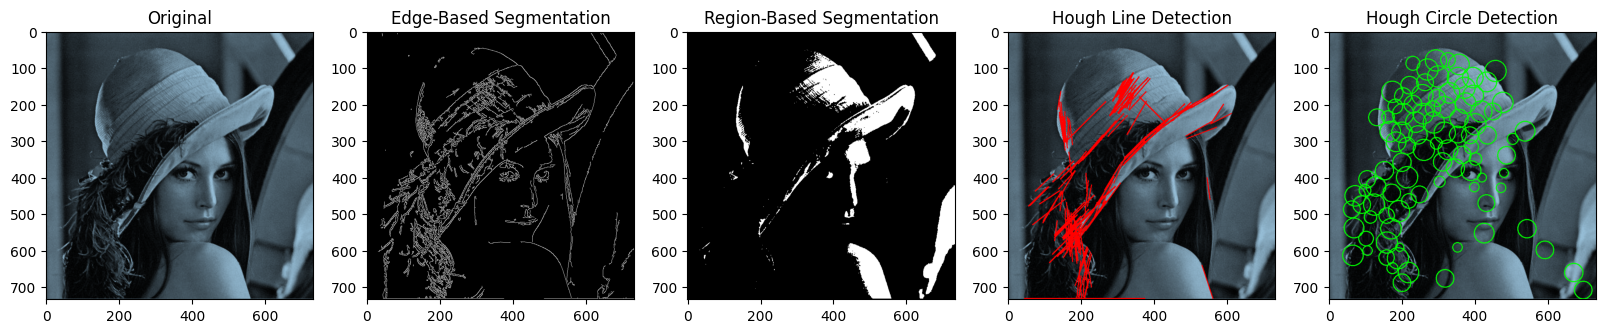

In [ ]:
# Example Usage
image_path = "Lena_Image.png"
image = load_image(image_path)
edge_seg = edge_based_segmentation(image)
region_seg = region_based_segmentation(image)
hough_lines = hough_line_detection(image)
image2=load_image("Lena_Image.png")
hough_circles = hough_circle_detection(image2)

display_results(image, edge_seg, region_seg, hough_lines, hough_circles)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
from ultralytics import YOLO
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load YOLOv5 model
yolo_model = YOLO('yolov5s.pt')


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 226MB/s]


In [ ]:
def detect_objects_yolo(image_path):
    results = yolo_model(image_path)  # Get the list of results
    for result in results:  # Iterate over results
        result.show()  # Display image with detections

In [ ]:
from google.colab.patches import cv2_imshow
def detect_objects_rcnn(image_path):
    # Load Faster R-CNN model
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = F.to_tensor(image).unsqueeze(0)

    # Perform object detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Draw bounding boxes
    for idx, box in enumerate(predictions[0]['boxes']):
        score = predictions[0]['scores'][idx].item()
        if score > 0.5:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{predictions[0]['labels'][idx].item()} ({score:.2f})"
            cv2.putText(image, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show result
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


image 1/1 /content/Lena_Image.png: 640x640 1 person, 15.0ms
Speed: 14.0ms preprocess, 15.0ms inference, 361.0ms postprocess per image at shape (1, 3, 640, 640)


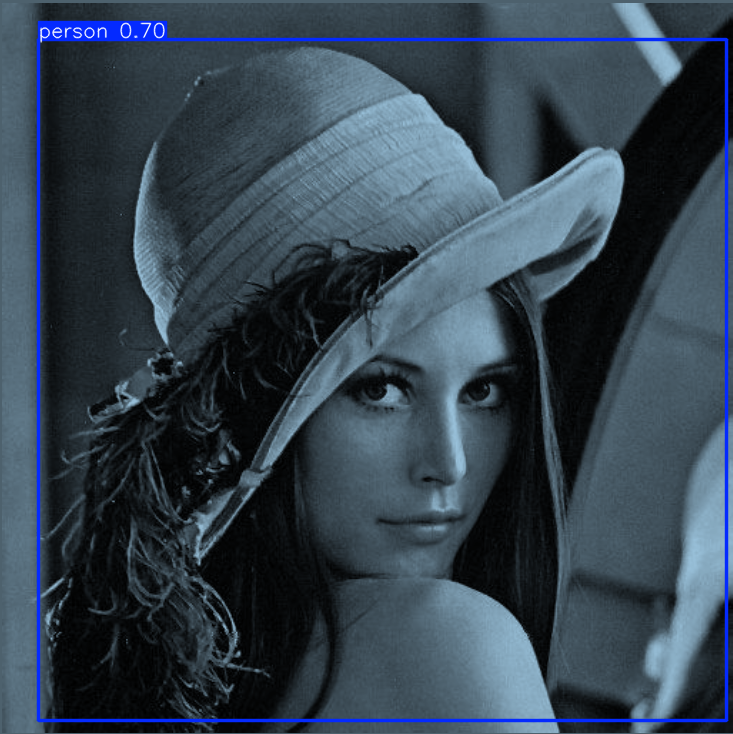

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 157MB/s]


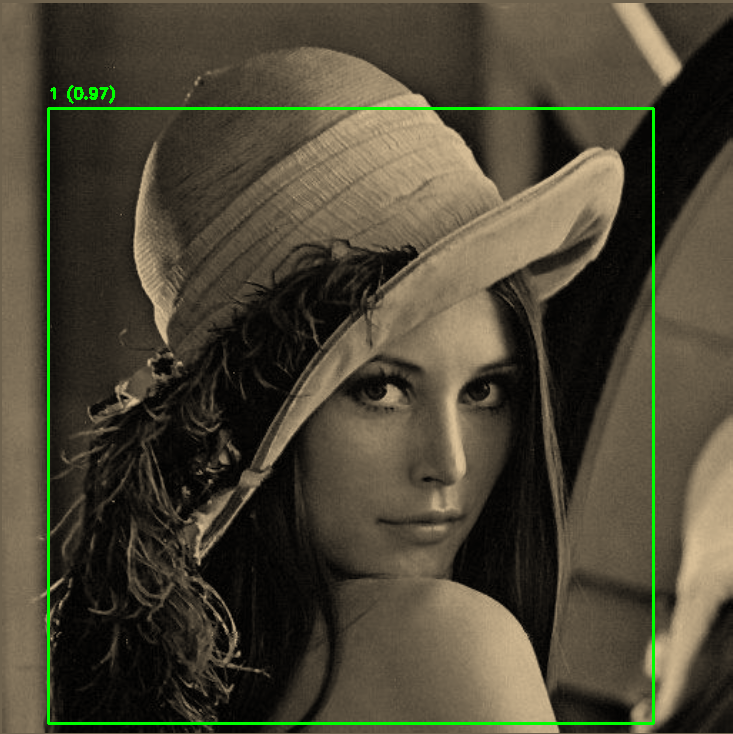

In [ ]:
# Example usage
image_path = 'Lena_Image.png'  # Replace with your image path
detect_objects_yolo(image_path)
detect_objects_rcnn(image_path)